## Types of  Clustering: Soft and Hard Clustering.
### Soft Clustering - Points belong to one or more clusters.
### Hard Clustering - Points belong to only one cluster.

## Types of Clustering Algorithms:
### 1. Connectivity based
### 2. Centroid based (highly used)
### 3. Distribution based (rarely used)
### 4. Density based

## Working with K mean Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split

In [3]:
iris = datasets.load_iris()

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [6]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


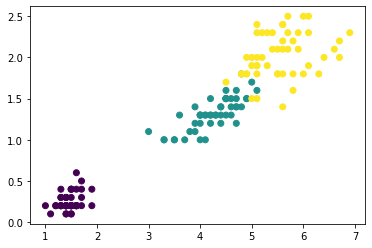

In [7]:
plt.scatter(df['petal length (cm)'], df['petal width (cm)'], c = df['target'], cmap = 'viridis')

In [8]:
X = df[['petal length (cm)','petal width (cm)']]
y = df['target']

X

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2
...,...,...
145,5.2,2.3
146,5.0,1.9
147,5.2,2.0
148,5.4,2.3


In [9]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [10]:
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

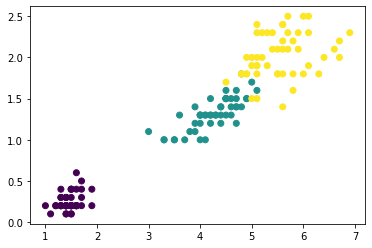

In [11]:
plt.scatter(df['petal length (cm)'], df['petal width (cm)'], c = df['target'], cmap = 'viridis')

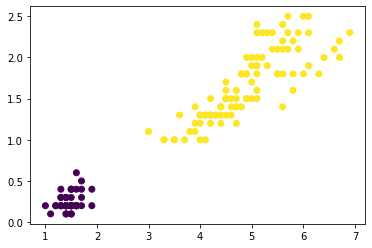

In [12]:
plt.scatter(df['petal length (cm)'], df['petal width (cm)'], c = kmeans.labels_, cmap = 'viridis')

## How to choose the value of clusters - Elbow Method

In [ ]:
SSE = [] # Sum of Squared Errors
index = range(1, 10)
for i in index:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    SSE.append(kmeans.inertia_)
    print(i, kmeans.inertia_)

Text(0, 0.5, 'SSE')

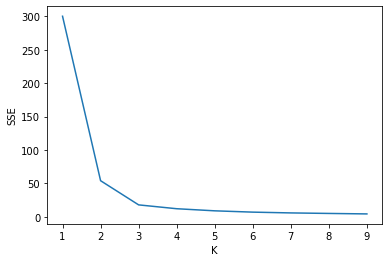

In [14]:
plt.plot(index, SSE)
plt.xlabel('K')
plt.ylabel('SSE')

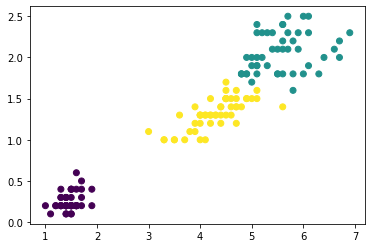

In [16]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
plt.scatter(df['petal length (cm)'], df['petal width (cm)'], c = kmeans.labels_, cmap = 'viridis')